# ЛАБОРАТОРНАЯ РАБОТА №3
### Классификация табличных данных на основе нейросетевых моделей
Вариант 6.

In [75]:
import pandas as pd
import numpy as np

from tensorflow import keras
from pandas import set_option

### Загрузка данных

In [76]:
FILENAME = "V6_classification_lr3.xlsx"
df = pd.read_excel(FILENAME)

### Ознакомление с данными

In [77]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [78]:
df.shape

(13611, 17)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

В наборе данных 17 столбцов. Целевой признак - Class - тип изучаемого сухого боба.

Все признаки, кроме целевого, имеют числовые типы. Пропущенных значений нет.

In [80]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Целевой признак принимает одно из семи значений. Классы не сбалансированы.

#### Анализ данных на основе гистограм

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

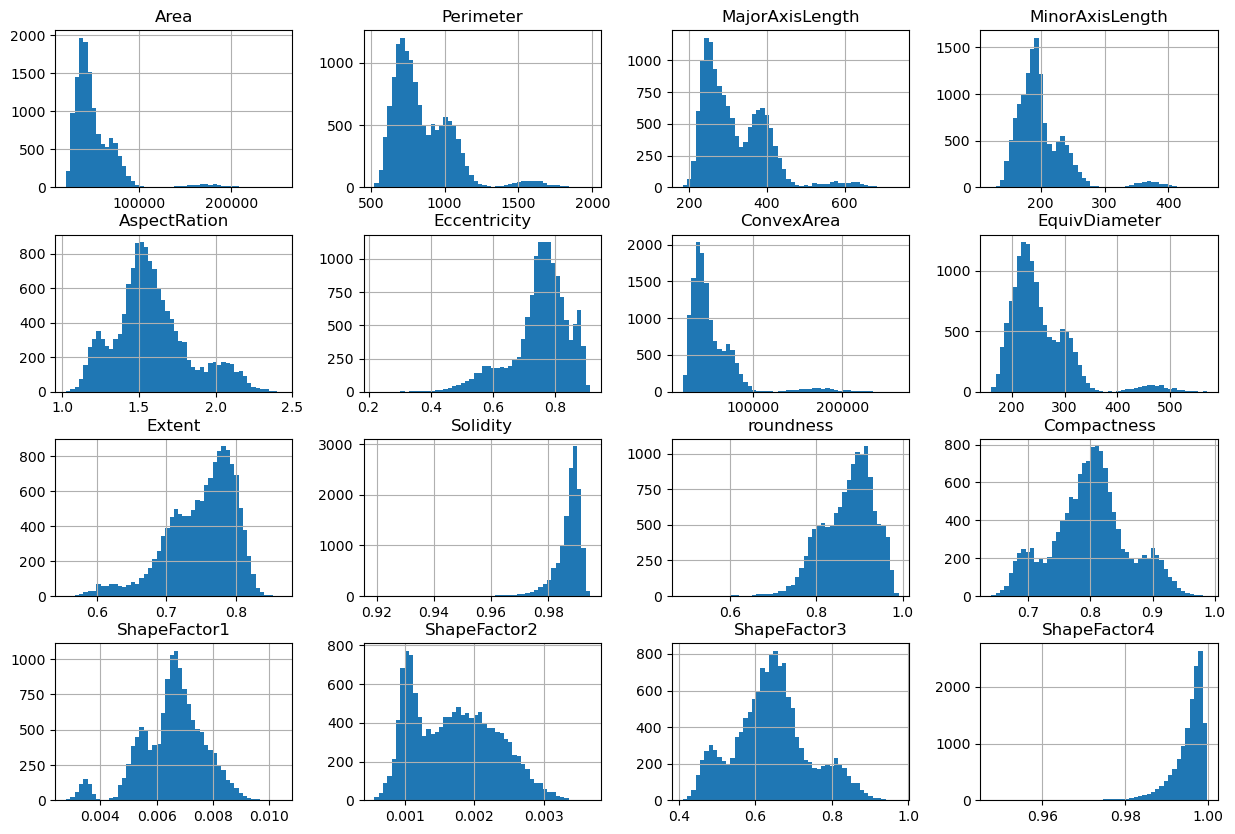

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))

Остальные признаки являются различными измерениями формы боба.

Признаки приближены к нормальному распеделению, но у многих из них есть необычные "скачки" не в точке математического ожидания, а также у некоторых гистограм наблюдаются тяжелые хвосты

### Корреляционный анализ

Закодируем классы целевого признака числами от 0 до 7. Будем использовать такое представление для анализа.

array([[<Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Perimeter', ylabel='Area'>,
        <Axes: xlabel='MajorAxisLength', ylabel='Area'>,
        <Axes: xlabel='MinorAxisLength', ylabel='Area'>,
        <Axes: xlabel='AspectRation', ylabel='Area'>,
        <Axes: xlabel='Eccentricity', ylabel='Area'>,
        <Axes: xlabel='ConvexArea', ylabel='Area'>,
        <Axes: xlabel='EquivDiameter', ylabel='Area'>,
        <Axes: xlabel='Extent', ylabel='Area'>,
        <Axes: xlabel='Solidity', ylabel='Area'>,
        <Axes: xlabel='roundness', ylabel='Area'>,
        <Axes: xlabel='Compactness', ylabel='Area'>,
        <Axes: xlabel='ShapeFactor1', ylabel='Area'>,
        <Axes: xlabel='ShapeFactor2', ylabel='Area'>,
        <Axes: xlabel='ShapeFactor3', ylabel='Area'>,
        <Axes: xlabel='ShapeFactor4', ylabel='Area'>,
        <Axes: xlabel='Class', ylabel='Area'>],
       [<Axes: xlabel='Area', ylabel='Perimeter'>,
        <Axes: xlabel='Perimeter', ylabel='Perimeter'>,
 

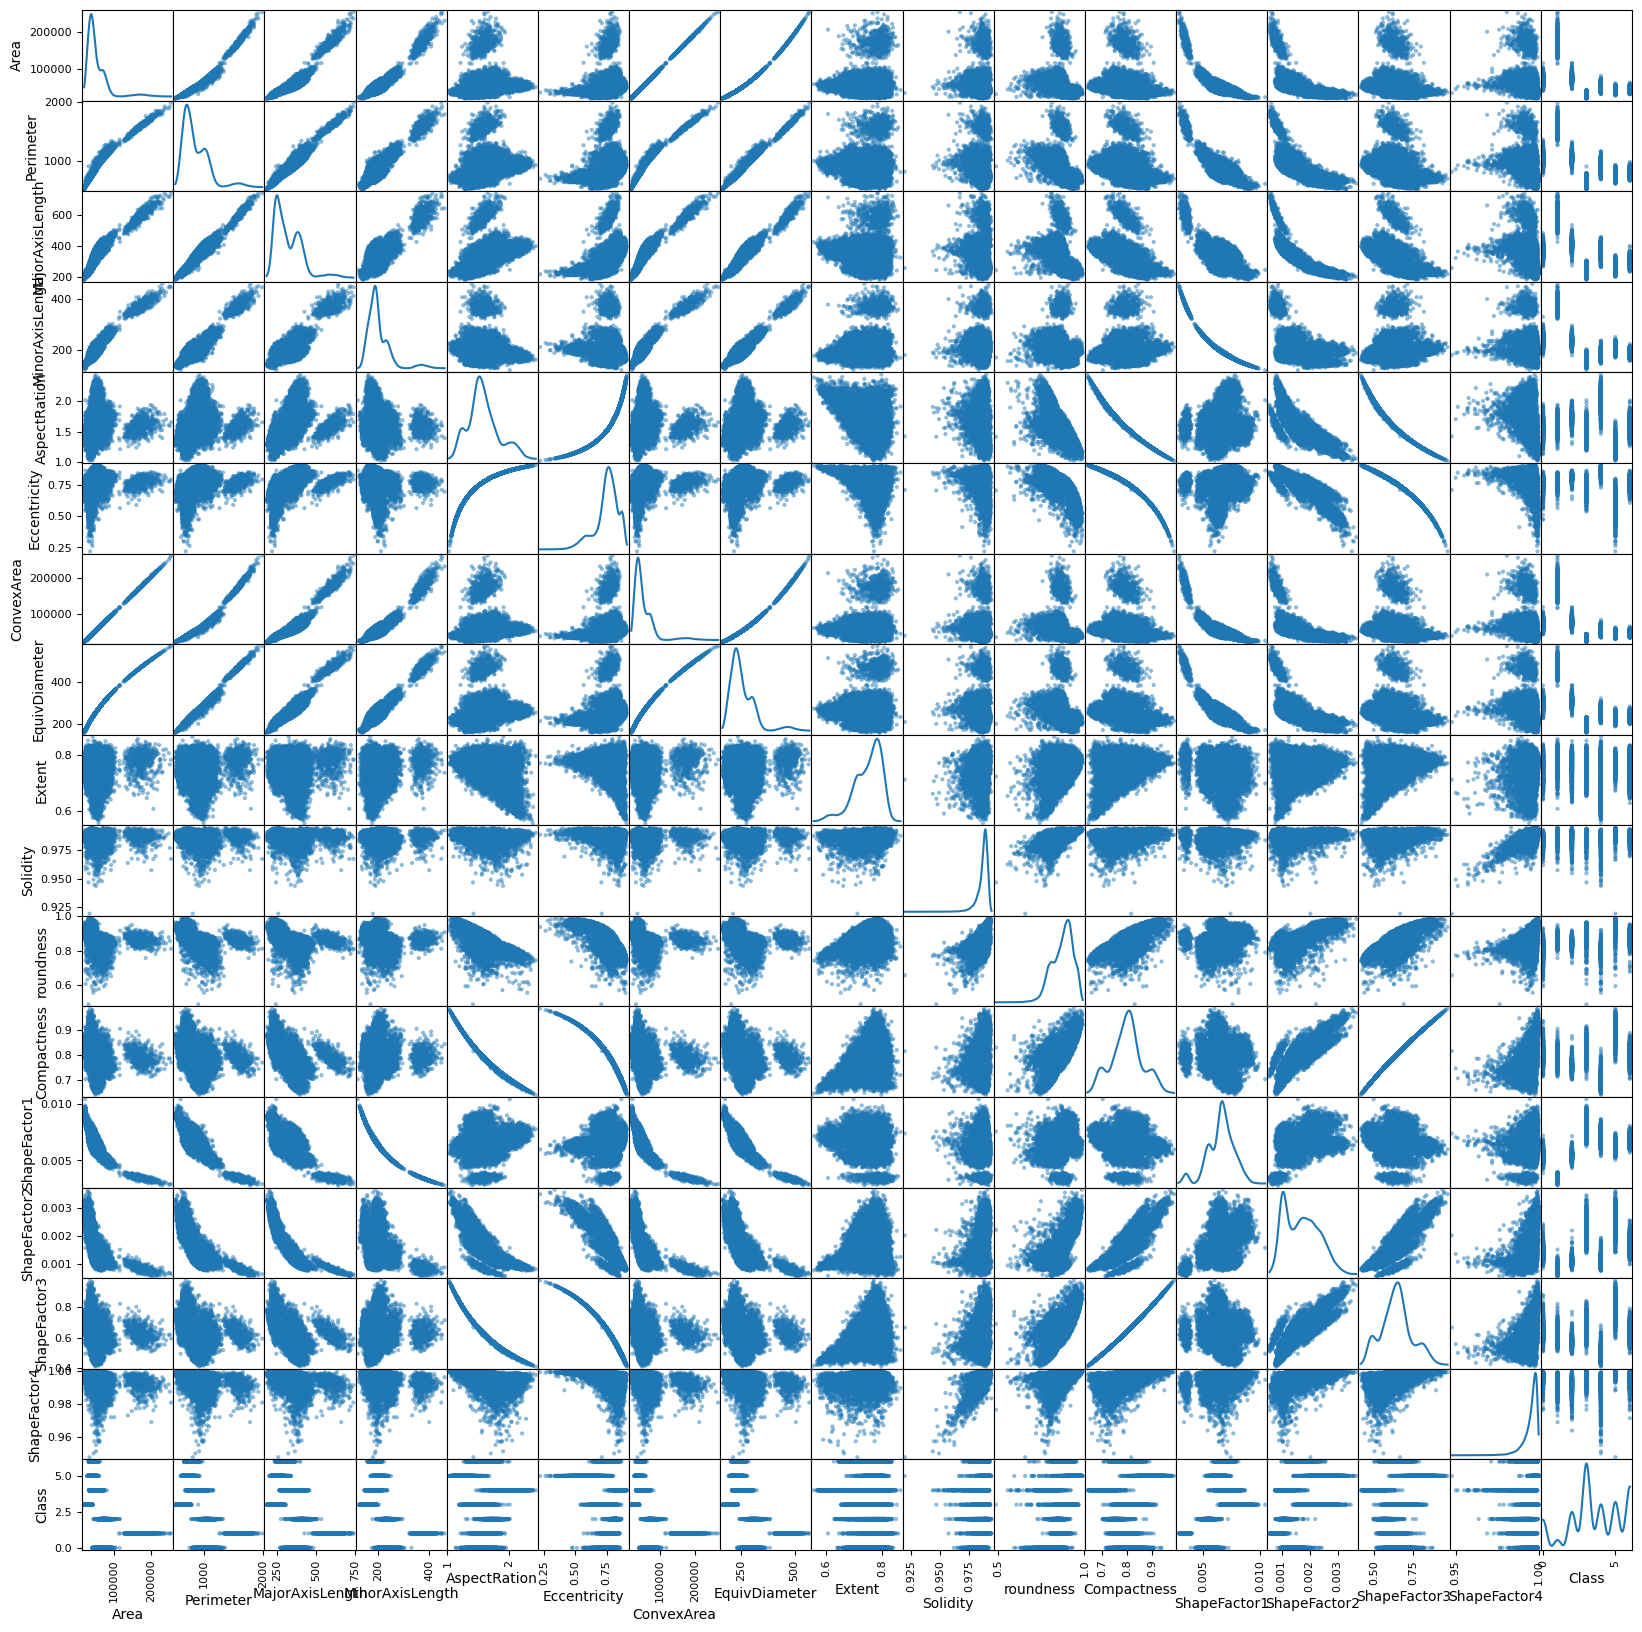

In [82]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
encoded_df = df.copy()
encoded_df['Class'] = ordinal_encoder.fit_transform(encoded_df.iloc[:, [-1]])

pd.plotting.scatter_matrix(encoded_df, figsize=(20, 20), diagonal='kde')

Из диаграмм рассеивания видно, что многие признаки явно коррелируют друг с другом (что логично, т.к. они представляют собой различные измерения размеров одного объекта).

Также можно установить, что некоторые классы целевого признака легко выявляются по таким признакам, как Area, Perimeter, Diameter и др. Однако другие классы практически неразличимы по этим атрибутам посредством построения матриц рассеивания. Ввиду этого, для данной задачи необходимо использование моделей машинного обучения.

In [83]:
correlation = encoded_df.corr()
print(correlation)

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

Наиболее сильная корреляция с целевым признаком наблюдается у:
- ShapeFactor1: 0.39
- roundness: 0.38
- ShapeFactor2: 0.33
- Solidity: 0.32

#### Проведем отбор признаков

In [84]:
from sklearn.feature_selection import SelectKBest, f_regression

data_X = df.loc[:, df.columns[:-1]]
data_Y = encoded_df['Class']

best_features = SelectKBest(f_regression, k=5)
fit = best_features.fit(data_X, data_Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(data_X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores

,0,0
0,Area,3970.616015
1,Perimeter,4724.479142
2,MajorAxisLength,3556.410544
3,MinorAxisLength,3622.273251
4,AspectRation,186.698142
5,Eccentricity,569.149302
6,ConvexArea,4018.487236
7,EquivDiameter,4098.508838
8,Extent,13.246863
9,Solidity,1566.448381


### Подготовка данных
В результате анализа признаков можно сделать вывод, что следует оставить следующие признаки:
- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- Solidity
- roundness
- ShapeFactor1
- ShapeFactor2

Проводить комбинацию признаков не имеет смысла, т.к. большая часть имеющихся признаков (таких как roundness, ShapeFactor) уже является комбинацией признаков.

In [85]:
prepared_X = df[["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "ConvexArea",
                 "EquivDiameter", "Solidity", "roundness", "ShapeFactor1", "ShapeFactor2"]]

### Кодирование признаков
Поскольку целевой признак - категориальный, для его кодирования можно использовать one-hot вектора

In [86]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

def target_encode(Y, encoder=one_hot_encoder):
    return 

initial_Y = one_hot_encoder.fit_transform(pd.DataFrame(df["Class"])).toarray()
initial_Y_t = initial_Y
prepared_Y = initial_Y
prepared_Y_t = initial_Y

initial_Y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Преобразование данных
По варианту - стандартизация

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


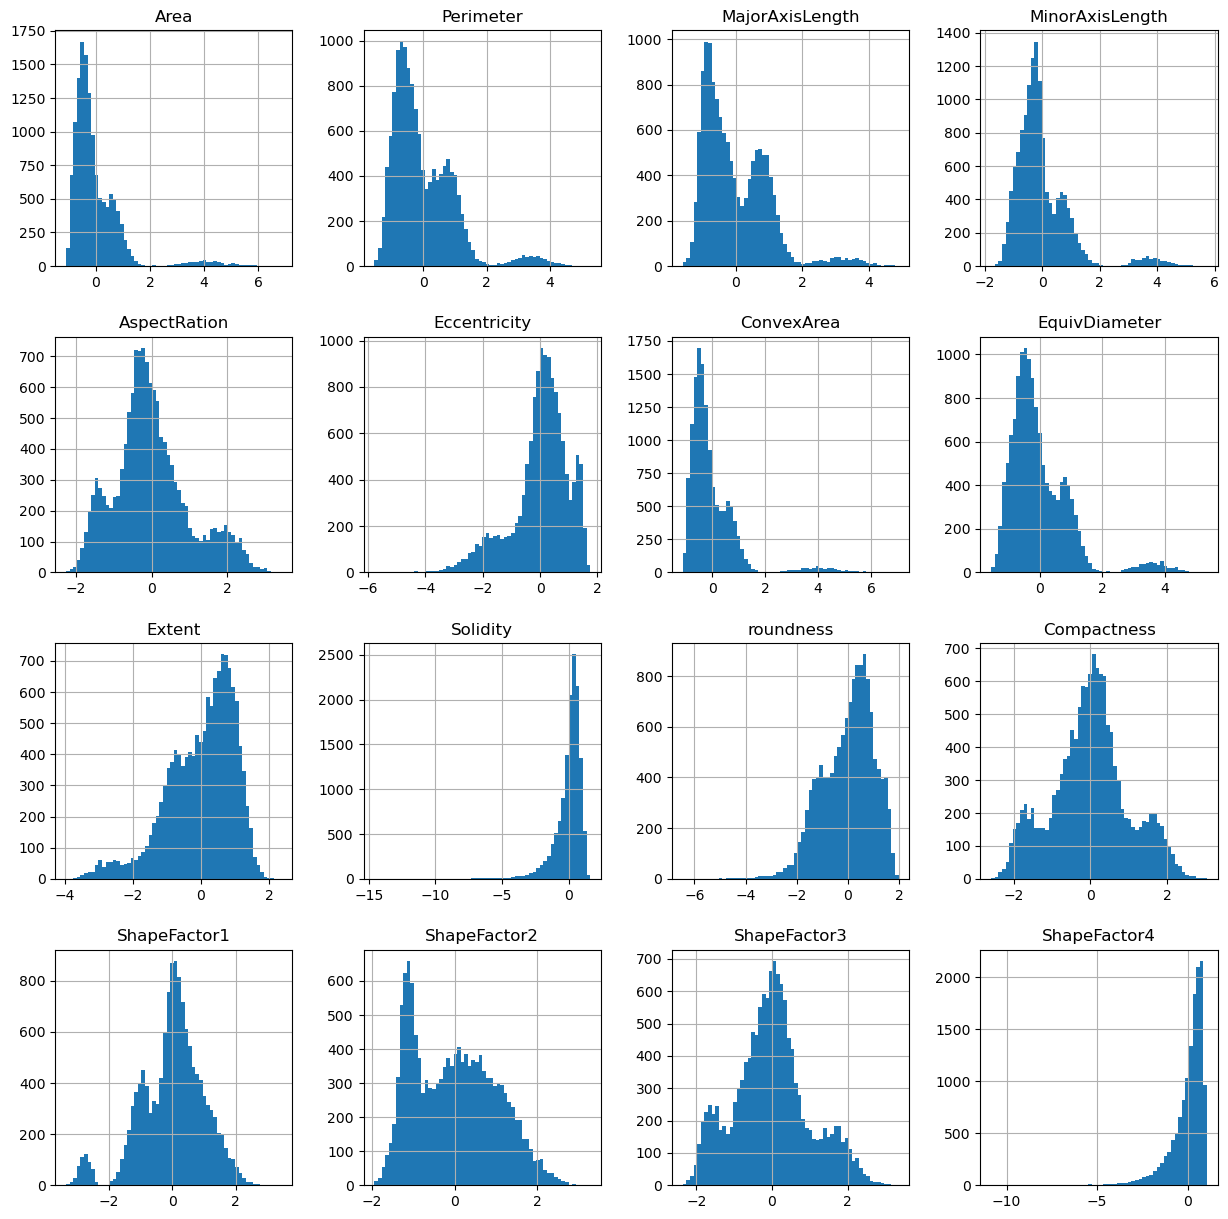

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

initial_X = df.iloc[:, :-1]

initial_X_t = pd.DataFrame(scaler.fit_transform(initial_X), columns=initial_X.columns)
prepared_X_t = pd.DataFrame(scaler.fit_transform(prepared_X), columns=prepared_X.columns)
initial_X_t.hist(bins=60, figsize=(15, 15))
initial_X_t.head()

Как можно увидеть из гистограм, признаки после стандартизации приобрели нормальное распределение с математическим ожиданием 0 и СКО 1.

### Формирование тестовой, обучающей, валидационной выборок

In [88]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.25
SEED = 42
SHUFFLE = True

def split(x, y, test_size=TEST_SIZE, seed=SEED, shuffle=SHUFFLE):
    return train_test_split(x, y, test_size=test_size, random_state=seed, shuffle=shuffle)

# Train/test split.
initial_X_train, initial_X_test, initial_Y_train, initial_Y_test = split(initial_X, initial_Y)
initial_X_t_train, initial_X_t_test, initial_Y_t_train, initial_Y_t_test = split(initial_X_t, initial_Y_t)
prepared_X_train, prepared_X_test, prepared_Y_train, prepared_Y_test = split(prepared_X, prepared_Y)
prepared_X_t_train, prepared_X_t_test, prepared_Y_t_train, prepared_Y_t_test = split(prepared_X_t, prepared_Y_t)

# Train/validation split.
initial_X_train, initial_X_val, initial_Y_train, initial_Y_val = split(initial_X_train, initial_Y_train)
initial_X_t_train, initial_X_t_val, initial_Y_t_train, initial_Y_t_val = split(initial_X_t_train, initial_Y_t_train)
prepared_X_train, prepared_X_val, prepared_Y_train, prepared_Y_val = split(prepared_X_train, prepared_Y_train)
prepared_X_t_train, prepared_X_t_val, prepared_Y_t_train, prepared_Y_t_val = split(prepared_X_t_train, prepared_Y_t_train)

print(f'initial_X_train - {initial_X_train.shape}, initial_X_val - {initial_X_val.shape}, initial_X_test - {initial_X_test.shape}')
print(f'initial_Y_train - {initial_Y_train.shape}, initial_Y_val - {initial_Y_val.shape}, initial_Y_test - {initial_Y_test.shape}')
print(f'prepared_X_train - {prepared_X_train.shape}, prepared_X_val - {prepared_X_val.shape}, prepared_X_test - {prepared_X_test.shape}')
print(f'prepared_Y_train - {prepared_Y_train.shape}, prepared_Y_val - {prepared_Y_val.shape}, prepared_Y_test - {prepared_Y_test.shape}')

initial_X_train - (7656, 16), initial_X_val - (2552, 16), initial_X_test - (3403, 16)
initial_Y_train - (7656, 7), initial_Y_val - (2552, 7), initial_Y_test - (3403, 7)
prepared_X_train - (7656, 10), prepared_X_val - (2552, 10), prepared_X_test - (3403, 10)
prepared_Y_train - (7656, 7), prepared_Y_val - (2552, 7), prepared_Y_test - (3403, 7)


### Построение полносвязной нейросетевой классификационной модели

In [89]:
from keras.metrics import F1Score

# Constants
LEARNING_RATE = 0.01
BATCH_SIZE = 32
EPOCHS = 20

# Model Definition
def get_ffnn_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(7, activation="softmax"), # seven classes -> seven neurons
    ])
    return model

# Compile Model
def compile_model(model):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss="categorical_crossentropy",
        metrics=[keras.metrics.CategoricalAccuracy(), F1Score(average="macro")],
    )

# Train Model
def fit_model(model, x_train, y_train, x_val, y_val, batch_size=BATCH_SIZE, epochs=EPOCHS):
    model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_val, y_val),
    )

# Evaluate Model
def evaluate_model(model, x_test, y_test, batch_size=BATCH_SIZE):
    return model.evaluate(x_test, y_test, batch_size=batch_size)


Обучение полносвязной модели на исходных данных

In [107]:
model_ffnn_initial = get_ffnn_model()
compile_model(model_ffnn_initial)
fit_model(model_ffnn_initial, initial_X_train, initial_Y_train, initial_X_val, initial_Y_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.2535 - f1_score: 0.0772 - loss: 184.9718 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8278
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2636 - f1_score: 0.0596 - loss: 1.8326 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8251
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.2577 - f1_score: 0.0585 - loss: 1.8373 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8244
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.2611 - f1_score: 0.0591 - loss: 1.8329 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8244
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2636 - f1_score: 0.0596 - loss: 1.8343 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8249
Epoch 6/20
240/240 ━━━━━━━━━

Обучение полносвязной модели на исходных преобразованных данных

In [108]:
model_ffnn_initial_t = get_ffnn_model()
compile_model(model_ffnn_initial_t)
fit_model(model_ffnn_initial_t, initial_X_t_train, initial_Y_t_train, initial_X_t_val, initial_Y_t_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.7818 - f1_score: 0.7773 - loss: 0.6275 - val_categorical_accuracy: 0.9103 - val_f1_score: 0.9158 - val_loss: 0.2484
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9046 - f1_score: 0.9136 - loss: 0.2560 - val_categorical_accuracy: 0.8899 - val_f1_score: 0.9055 - val_loss: 0.3018
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9149 - f1_score: 0.9274 - loss: 0.2350 - val_categorical_accuracy: 0.9193 - val_f1_score: 0.9318 - val_loss: 0.2273
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9184 - f1_score: 0.9320 - loss: 0.2130 - val_categorical_accuracy: 0.9216 - val_f1_score: 0.9319 - val_loss: 0.2237
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9230 - f1_score: 0.9329 - loss: 0.2092 - val_categorical_accuracy: 0.9107 - val_f1_score: 0.9231 - val_loss: 0.2463
Epoch 6/20
240/240 ━━━━━━━━━━━

Значения метрик F1 и accuracy увеличились, т.е. стандартизация данных улучшает результат.

Обучение полносвязной модели на подготовленных данных

In [109]:
model_ffnn_prepared = get_ffnn_model()
compile_model(model_ffnn_prepared)
fit_model(model_ffnn_prepared, prepared_X_train, prepared_Y_train, prepared_X_val, prepared_Y_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.2002 - f1_score: 0.1078 - loss: 620.6814 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8345
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.2709 - f1_score: 0.0609 - loss: 1.8335 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8257
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2680 - f1_score: 0.0604 - loss: 1.8259 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8259
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2542 - f1_score: 0.0579 - loss: 1.8420 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8246
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2703 - f1_score: 0.0608 - loss: 1.8298 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8251
Epoch 6/20
240/240 ━━━━━━━━━

Обучение полносвязной модели на подготовленных стандартизированных данных

In [110]:
model_ffnn_prepared_t = get_ffnn_model()
compile_model(model_ffnn_prepared_t)
fit_model(model_ffnn_prepared_t, prepared_X_t_train, prepared_Y_t_train, prepared_X_t_val, prepared_Y_t_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.7355 - f1_score: 0.7212 - loss: 0.7313 - val_categorical_accuracy: 0.9071 - val_f1_score: 0.9183 - val_loss: 0.2663
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9112 - f1_score: 0.9194 - loss: 0.2519 - val_categorical_accuracy: 0.9122 - val_f1_score: 0.9231 - val_loss: 0.2433
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9171 - f1_score: 0.9285 - loss: 0.2366 - val_categorical_accuracy: 0.9114 - val_f1_score: 0.9241 - val_loss: 0.2584
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9088 - f1_score: 0.9168 - loss: 0.2605 - val_categorical_accuracy: 0.9107 - val_f1_score: 0.9228 - val_loss: 0.2385
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9144 - f1_score: 0.9228 - loss: 0.2316 - val_categorical_accuracy: 0.9130 - val_f1_score: 0.9247 - val_loss: 0.2510
Epoch 6/20
240/240 ━━━━━━━━━━━

Модели, обученные на подготовленных данных оказались немного хуже по метрикам F1 и categorical_accuracy.

### Построение двунаправленной сети LSTM
Для использования рекуррентных сетей следует развернуть двумерные данные в трехмерные:

In [ ]:
def reshape_to_3d(df):
    tensor = np.array(df)
    return tensor.reshape(tensor.shape[0], 1, tensor.shape[1])

rnn_initial_X = reshape_to_3d(initial_X)
rnn_initial_X_t = reshape_to_3d(initial_X_t)
rnn_prepared_X = reshape_to_3d(prepared_X)
rnn_prepared_X_t = reshape_to_3d(prepared_X_t)

print(f"initial: {rnn_initial_X.shape}")
print(f"initial transformed: {rnn_initial_X_t.shape}")
print(f"prepared: {rnn_prepared_X.shape}")
print(f"prepared transformed: {rnn_prepared_X_t.shape}")

initial: (13611, 1, 16)
initial transformed: (13611, 1, 16)
prepared: (13611, 1, 10)
prepared transformed: (13611, 1, 10)


In [ ]:
rnn_initial_X_train, rnn_initial_X_test, rnn_initial_Y_train, rnn_initial_Y_test = split(rnn_initial_X, initial_Y)
rnn_initial_X_t_train, rnn_initial_X_t_test, rnn_initial_Y_t_train, rnn_initial_Y_t_test = split(rnn_initial_X_t, initial_Y_t)
rnn_prepared_X_train, rnn_prepared_X_test, rnn_prepared_Y_train, rnn_prepared_Y_test = split(rnn_prepared_X, prepared_Y)
rnn_prepared_X_t_train, rnn_prepared_X_t_test, rnn_prepared_Y_t_train, rnn_prepared_Y_t_test = split(rnn_prepared_X_t, prepared_Y_t)

rnn_initial_X_train, rnn_initial_X_val, rnn_initial_Y_train, rnn_initial_Y_val =\
    split(rnn_initial_X_train, rnn_initial_Y_train)

rnn_initial_X_t_train, rnn_initial_X_t_val, rnn_initial_Y_t_train, rnn_initial_Y_t_val =\
    split(rnn_initial_X_t_train, rnn_initial_Y_t_train)

rnn_prepared_X_train, rnn_prepared_X_val, rnn_prepared_Y_train, rnn_prepared_Y_val =\
    split(rnn_prepared_X_train, rnn_prepared_Y_train)

rnn_prepared_X_t_train, rnn_prepared_X_t_val, rnn_prepared_Y_t_train, rnn_prepared_Y_t_val =\
    split(rnn_prepared_X_t_train, rnn_prepared_Y_t_train)

In [ ]:
def get_rnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(32)))
    model.add(keras.layers.Dense(7, activation="softmax"))
    return model

Обучение рекуррентной модели на исходных данных

In [103]:
model_rnn_initial = get_rnn_model()
compile_model(model_rnn_initial)
fit_model(model_rnn_initial, rnn_initial_X_train, rnn_initial_Y_train, rnn_initial_X_val, rnn_initial_Y_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.2415 - f1_score: 0.0787 - loss: 1.8592 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8247
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2628 - f1_score: 0.0656 - loss: 1.8383 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8301
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2686 - f1_score: 0.0620 - loss: 1.8376 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8280
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2618 - f1_score: 0.0786 - loss: 1.8350 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8292
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2601 - f1_score: 0.0772 - loss: 1.8405 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8370
Epoch 6/20
240/240 ━━━━━━━━━━━

Обучение рекуррентной модели на исходных подготовленных данных

In [104]:
model_rnn_initial_t = get_rnn_model()
compile_model(model_rnn_initial_t)
fit_model(model_rnn_initial_t, rnn_initial_X_t_train, rnn_initial_Y_t_train, rnn_initial_X_t_val, rnn_initial_Y_t_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.8188 - f1_score: 0.8180 - loss: 0.5750 - val_categorical_accuracy: 0.9158 - val_f1_score: 0.9282 - val_loss: 0.2338
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9248 - f1_score: 0.9360 - loss: 0.2136 - val_categorical_accuracy: 0.9142 - val_f1_score: 0.9261 - val_loss: 0.2254
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9192 - f1_score: 0.9328 - loss: 0.2091 - val_categorical_accuracy: 0.9275 - val_f1_score: 0.9385 - val_loss: 0.2053
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9204 - f1_score: 0.9325 - loss: 0.2136 - val_categorical_accuracy: 0.9310 - val_f1_score: 0.9417 - val_loss: 0.2018
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9305 - f1_score: 0.9404 - loss: 0.1917 - val_categorical_accuracy: 0.9216 - val_f1_score: 0.9310 - val_loss: 0.2087
Epoch 6/20
240/240 ━━━━━━━━━━━

Данная модель оказалась лучшей по метрикам F1, loss на тренировочных и валидационных данных.

Обучение рекуррентной модели на подготовленных данных

In [105]:
model_rnn_prepared = get_rnn_model()
compile_model(model_rnn_prepared)
fit_model(model_rnn_prepared, rnn_prepared_X_train, rnn_prepared_Y_train, rnn_prepared_X_val, rnn_prepared_Y_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.2579 - f1_score: 0.0777 - loss: 1.8564 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8495
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.2416 - f1_score: 0.0898 - loss: 1.8583 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8266
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2485 - f1_score: 0.0842 - loss: 1.8502 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8345
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2461 - f1_score: 0.0794 - loss: 1.8424 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8360
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2600 - f1_score: 0.0731 - loss: 1.8439 - val_categorical_accuracy: 0.2661 - val_f1_score: 0.0600 - val_loss: 1.8339
Epoch 6/20
240/240 ━━━━━━━━━━━

Обучение рекуррентной модели на подготовленных преобразованных данных

In [106]:
model_rnn_prepared_t = get_rnn_model()
compile_model(model_rnn_prepared_t)
fit_model(model_rnn_prepared_t, rnn_prepared_X_t_train, rnn_prepared_Y_t_train, rnn_prepared_X_t_val, rnn_prepared_Y_t_val)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.7767 - f1_score: 0.7808 - loss: 0.6787 - val_categorical_accuracy: 0.9154 - val_f1_score: 0.9270 - val_loss: 0.2327
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9158 - f1_score: 0.9256 - loss: 0.2322 - val_categorical_accuracy: 0.9111 - val_f1_score: 0.9207 - val_loss: 0.2343
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9140 - f1_score: 0.9240 - loss: 0.2373 - val_categorical_accuracy: 0.9158 - val_f1_score: 0.9267 - val_loss: 0.2300
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9169 - f1_score: 0.9268 - loss: 0.2227 - val_categorical_accuracy: 0.9165 - val_f1_score: 0.9274 - val_loss: 0.2296
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9156 - f1_score: 0.9273 - loss: 0.2174 - val_categorical_accuracy: 0.9216 - val_f1_score: 0.9338 - val_loss: 0.2262
Epoch 6/20
240/240 ━━━━━━━━━━━

Полученные метрики немного ниже, чем у модели, обученной на исходных преобразованных данных.

Итого, лучшей моделью стала рекуррентная сеть, обученная на исходных преобразованных данных. Значения ее метрик categorical_accuracy, F1 немного выше на тренировочных и валидационных данных, чем у остальных моделей, а categorical_cross_entropy_loss ниже.

In [111]:
evaluate_model(model_rnn_initial_t, rnn_initial_X_t_test, rnn_initial_Y_t_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.9300 - f1_score: 0.9377 - loss: 0.1952


[0.20950733125209808, 0.9271231293678284, 0.9368872046470642]

На тестовых данных также получены неплохие значения метрик и функции потерь.

### GridSearch

In [120]:
from itertools import product
from sklearn.metrics import f1_score, balanced_accuracy_score

def build_model(num_layers, num_neurons, learning_rate):
    model = keras.Sequential()

    for _ in range(num_layers - 1):
        model.add(keras.layers.Bidirectional(keras.layers.LSTM(num_neurons, return_sequences=True)))

    model.add(keras.layers.Bidirectional(keras.layers.LSTM(num_neurons, return_sequences=False)))

    model.add(keras.layers.Dense(7, activation="softmax", use_bias=True))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy"
    )

    return model

# Params to optimize
param_grid = {
    'num_layers': [2, 3],
    'num_neurons': [32, 64],
    'batch_size': [16, 32],
    'learning_rate': [0.0001, 0.001, 0.1],
    'epochs': [20]
}

for num_layers, num_neurons, batch_size, learning_rate, epochs in product(*param_grid.values()):
    model = build_model(num_layers, num_neurons, learning_rate)
    model.fit(rnn_initial_X_t_train, rnn_initial_Y_t_train, epochs=epochs, batch_size=batch_size,
              verbose=0, validation_data=(rnn_initial_X_t_val, rnn_initial_Y_t_val))
    
    val_y_pred = np.argmax(model.predict(rnn_initial_X_t_val), axis=1)
    val_true = np.argmax(rnn_initial_Y_t_val, axis=1)
                
    f1 = f1_score(val_true, val_y_pred, average="macro")
    accuracy = balanced_accuracy_score(val_true, val_y_pred)
    
    print(f"Testing: layers={num_layers}, neurons={num_neurons}, learning_rate={learning_rate}, batch_size={batch_size};\n",
          f"\tF1 = {f1}, balanced accuracy = {accuracy}\n")

80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
Testing: layers=2, neurons=32, learning_rate=0.0001, batch_size=16;
 	F1 = 0.933436779844282, balanced accuracy = 0.932315986198615

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Testing: layers=2, neurons=32, learning_rate=0.001, batch_size=16;
 	F1 = 0.9419312980815692, balanced accuracy = 0.9399265958340228

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Testing: layers=2, neurons=32, learning_rate=0.1, batch_size=16;
 	F1 = 0.9011706771665733, balanced accuracy = 0.901008485008426

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Testing: layers=2, neurons=32, learning_rate=0.0001, batch_size=32;
 	F1 = 0.9325736715519367, balanced accuracy = 0.9315084464650161

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Testing: layers=2, neurons=32, learning_rate=0.001, batch_size=32;
 	F1 = 0.9416020129454363, balanced accuracy = 0.9409329040350726

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Testing: layers=2, neurons=32, learning_rate=0.1, batch_size=32;
 	F1 = 0.8975549815775389, b

Лучшей моделью в результате GridSearch оказалась модель с параметрами:
- два слоя по 32 нейрона, один слой с семью нейронами (выходной)
- скорость обучения - 0.001
- размер батча - 16

In [125]:
EPOCHS = 20

best_model = build_model(2, 32, 0.001)
compile_model(best_model)

fit_model(best_model, rnn_initial_X_t_train, rnn_initial_Y_t_train, rnn_initial_X_t_val, rnn_initial_Y_t_val, epochs=EPOCHS, batch_size=16)

Epoch 1/20
479/479 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - categorical_accuracy: 0.8261 - f1_score: 0.8321 - loss: 0.4927 - val_categorical_accuracy: 0.9150 - val_f1_score: 0.9251 - val_loss: 0.2578
Epoch 2/20
479/479 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.9139 - f1_score: 0.9228 - loss: 0.2369 - val_categorical_accuracy: 0.9216 - val_f1_score: 0.9342 - val_loss: 0.2495
Epoch 3/20
479/479 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.9227 - f1_score: 0.9313 - loss: 0.2251 - val_categorical_accuracy: 0.9048 - val_f1_score: 0.9218 - val_loss: 0.2883
Epoch 4/20
479/479 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.9263 - f1_score: 0.9382 - loss: 0.1984 - val_categorical_accuracy: 0.9181 - val_f1_score: 0.9289 - val_loss: 0.2441
Epoch 5/20
479/479 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.9258 - f1_score: 0.9324 - loss: 0.2071 - val_categorical_accuracy: 0.9158 - val_f1_score: 0.9287 - val_loss: 0.2372
Epoch 6/20
479/479 ━━━━━━━━━

In [126]:
best_model.evaluate(
    rnn_initial_X_t_test,
    rnn_initial_Y_t_test,
    batch_size=16)

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9261 - f1_score: 0.9370 - loss: 0.2264


[0.25162699818611145, 0.9186012148857117, 0.931693971157074]

### Показатели метрик немного ухудшились на тестовых данных

Таким образом, лучшей моделью стала рекурентная модель, обученная на исходных стандартизированных данных.

GridSearch не улучшил результат. Ввиду этого лучше выбрать исходную архитектуру сети - 2 двунаправленных слоя LSTM по 32 нейрона. Скорость обучения - 0.01, размер батчей - 32

Лучший результат метрики $F1$ составил 0,93 для тестовых данных и 0,94 на тренировочных, что является хорошим результатом.